## Apple Health Processor - Weight

-----

## Dependencies and Libraries

In [2]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Functions for Processing Dates and Timezones

In [3]:
# functions to convert UTC to Local time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('America/New_York'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Weight

In [4]:
weight = pd.read_csv("data/apple_health_export/BodyMass.csv")

In [5]:
weight.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,IFTTT,1068,NaN,BodyMass,lb,2019-09-28 07:47:40 -0400,2019-09-28 03:07:00 -0400,2019-09-28 03:07:00 -0400,298.6
1,IFTTT,1068,NaN,BodyMass,lb,2019-10-01 08:45:31 -0400,2019-10-01 07:46:00 -0400,2019-10-01 07:46:00 -0400,296.6
2,IFTTT,1072,NaN,BodyMass,lb,2019-10-02 08:31:44 -0400,2019-10-02 07:20:00 -0400,2019-10-02 07:20:00 -0400,295.5
3,IFTTT,1072,NaN,BodyMass,lb,2019-10-03 08:41:50 -0400,2019-10-03 07:48:00 -0400,2019-10-03 07:48:00 -0400,296.4
4,IFTTT,1072,NaN,BodyMass,lb,2019-10-04 08:31:20 -0400,2019-10-04 07:24:00 -0400,2019-10-04 07:24:00 -0400,293.6


In [6]:
weight['startDate'] = pd.to_datetime(weight['startDate'])
weight['year'] = weight['startDate'].map(get_year)
weight['month'] = weight['startDate'].map(get_month)
weight['date'] = weight['startDate'].map(get_date)

In [7]:
weight.tail()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date
1135,EufyLife,8,NaN,BodyMass,lb,2022-07-18 08:02:59 -0400,2022-07-18 08:02:59-04:00,2022-07-18 08:02:59 -0400,260.3,2022,2022-07,2022-07-18
1136,EufyLife,8,NaN,BodyMass,lb,2022-07-19 07:42:37 -0400,2022-07-04 13:47:10-04:00,2022-07-04 13:47:10 -0400,260.5,2022,2022-07,2022-07-04
1137,EufyLife,8,NaN,BodyMass,lb,2022-07-19 07:42:48 -0400,2022-07-19 07:42:48-04:00,2022-07-19 07:42:48 -0400,259.4,2022,2022-07,2022-07-19
1138,EufyLife,8,NaN,BodyMass,lb,2022-07-20 07:34:54 -0400,2022-07-04 13:47:18-04:00,2022-07-04 13:47:18 -0400,260.5,2022,2022-07,2022-07-04
1139,EufyLife,8,NaN,BodyMass,lb,2022-07-20 07:35:04 -0400,2022-07-20 07:35:04-04:00,2022-07-20 07:35:04 -0400,259.9,2022,2022-07,2022-07-20


In [8]:
weight.columns

Index(['sourceName', 'sourceVersion', 'device', 'type', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'year', 'month', 'date'],
      dtype='object')

In [9]:
years = [2021, 2022]
wt_filtered = weight[weight.year.isin(years)]

In [10]:
weight_by_date = weight.groupby(['date'])['value'].min().reset_index(name='Weight') # take min weight if multiple per day

In [11]:
wt_filtered_by_date = wt_filtered.groupby(['date'])['value'].min().reset_index(name='Weight') # take min weight if multiple per day

In [12]:
weight_by_date.to_csv("data/weight_per_day.csv", index=False)

<AxesSubplot:title={'center':'Daily weight'}, xlabel='date'>

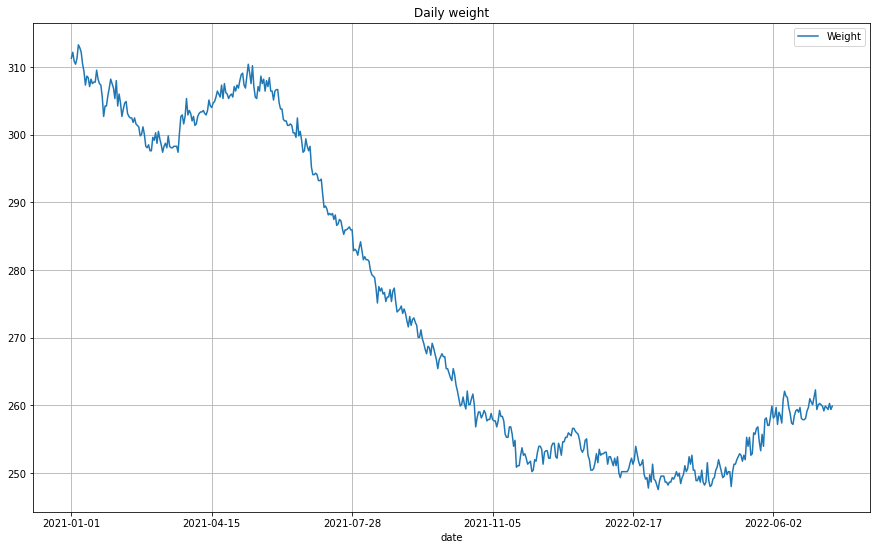

In [13]:
wt_filtered_by_date['RollingMeanWeight'] = wt_filtered_by_date.Weight.rolling(window=7, center=True).mean()
wt_filtered_by_date.plot(x='date', y='Weight', title= 'Daily weight', figsize=[15, 9], grid=True)

## Rolling Average

<AxesSubplot:title={'center':'Daily weight rolling mean over 7 days'}, xlabel='date'>

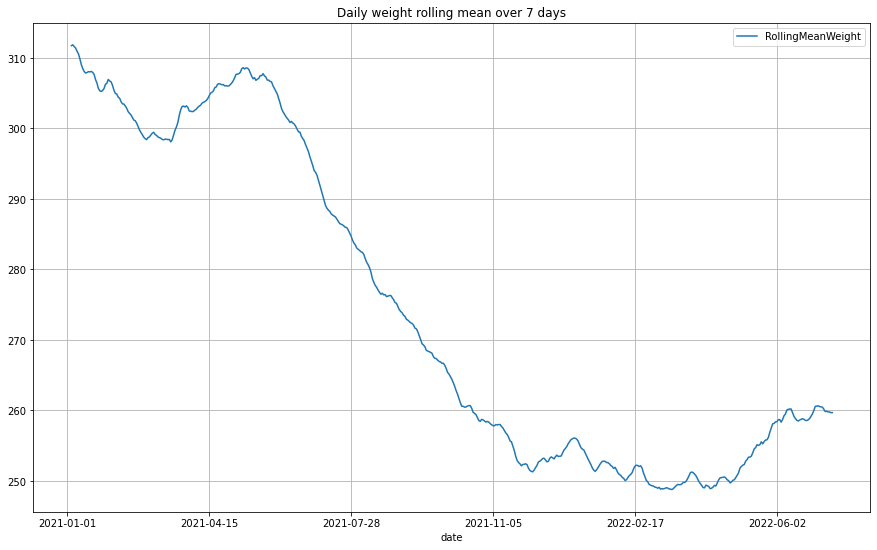

In [14]:
wt_filtered_by_date['RollingMeanWeight'] = wt_filtered_by_date.Weight.rolling(window=7, center=True).mean()
wt_filtered_by_date.plot(x='date', y='RollingMeanWeight', title= 'Daily weight rolling mean over 7 days', figsize=[15, 9], grid=True)
#print (plt.get_xlim())
#left_limit = float("2021-05-13".replace("-", ""))
#plt.set_xlim(1, 0)


------

In [15]:
month_weight = wt_filtered.groupby(['month'])['value'].mean().reset_index(name='Weight')

In [16]:
# month_weight

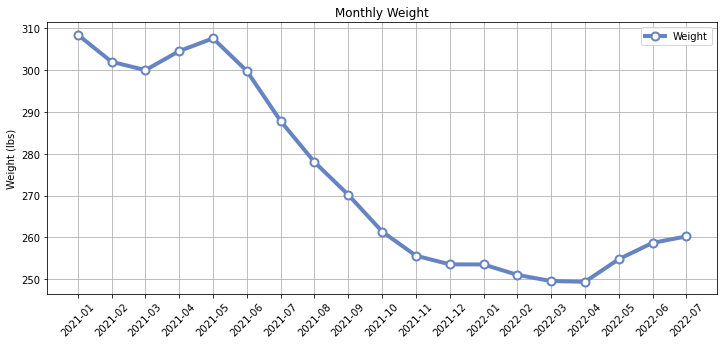

In [17]:
# a bit of a hackish solution, could use improvement
dataset = month_weight
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_xticklabels(dataset.month, rotation=45)
ax.set_ylabel('Weight (lbs)')
#plt.xtickslabels(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()